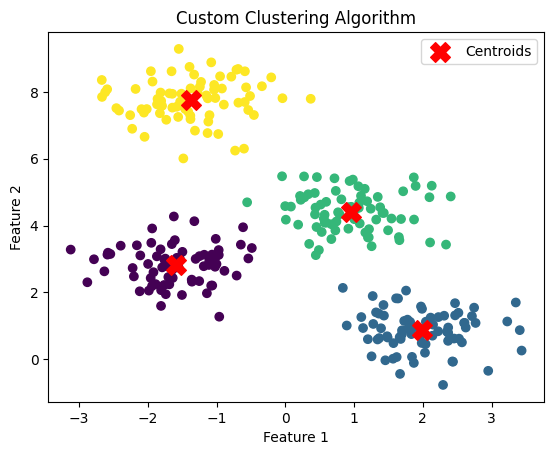

In [2]:
# Question 10: Implementing a Custom Clustering Algorithm
# Description: Design and implement a simple custom clustering algorithm using Python for educational purposes.

import numpy as np
import matplotlib.pyplot as plt

# Custom K-means-like Clustering Algorithm
class CustomKMeans:
    def __init__(self, n_clusters, max_iters=100, tol=1e-4):
        self.n_clusters = n_clusters  # Number of clusters
        self.max_iters = max_iters    # Maximum iterations
        self.tol = tol                # Tolerance for convergence
    
    def fit(self, X):
        # Step 1: Randomly initialize centroids
        np.random.seed(42)
        random_idx = np.random.choice(len(X), self.n_clusters, replace=False)
        self.centroids = X[random_idx]
        
        for i in range(self.max_iters):
            # Step 2: Assign each point to the nearest centroid
            labels = self._assign_labels(X)
            
            # Step 3: Update centroids
            new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(self.n_clusters)])
            
            # Step 4: Check for convergence (if centroids do not change significantly)
            if np.all(np.abs(new_centroids - self.centroids) <= self.tol):
                break
            
            self.centroids = new_centroids
        
        return self
    
    def _assign_labels(self, X):
        # Calculate distances from each point to each centroid
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        # Assign labels based on the closest centroid
        labels = np.argmin(distances, axis=1)
        return labels
    
    def predict(self, X):
        # Assign labels for new data points based on the trained centroids
        return self._assign_labels(X)
    
    def plot_clusters(self, X, labels):
        # Plot the data points and cluster centroids
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
        plt.title("Custom Clustering Algorithm")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.legend()
        plt.show()

# Example usage
if __name__ == "__main__":
    # Generate synthetic data for clustering
    from sklearn.datasets import make_blobs
    
    X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

    # Initialize and fit the Custom KMeans model
    kmeans = CustomKMeans(n_clusters=4)
    kmeans.fit(X)

    # Predict clusters
    labels = kmeans.predict(X)
    
    # Plot the clusters
    kmeans.plot_clusters(X, labels)
